In [1]:
import Bio
from Bio import SeqIO
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pandas as pd 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from itertools import product
import random
from six.moves import cPickle as pickle
import xgboost as xgb
from Bio.SeqIO.FastaIO import SimpleFastaParser
from sklearn import preprocessing


# data_root = "C:\\Users\\Tigran PC\\Desktop\\MicrobiomicsData\\data\\" # notebook
# data_root = "/Users/tigran/Desktop/sbv/data/" # imac
data_root = "D:\\sbv Microbiomics\\data\\" # istc pc

sub_data_root = data_root + "sample01split/"

In [21]:
def random_cut(full_seq, sub_seq_len, overlap_coef):
    cut_indexes = random.sample(range(0, len(full_seq)-sub_seq_len), int(overlap_coef * (len(full_seq))/sub_seq_len))
    seq_list = np.array([full_seq[i:i+sub_seq_len] for i in cut_indexes])
    seq_list = [k for k in seq_list if 'N'*15 not in k]
    return seq_list
    
    
def make_arrays(nb_rows, nb_features):
    if nb_rows:
        dataset = np.ndarray((nb_rows, nb_features), dtype=np.float32)
    else:
        dataset, labels = None, None
    return dataset

def make_features(seq_list, sub_seq_bank):
    features_list  = make_arrays(len(seq_list), len(sub_seq_bank))
    for i, seq in enumerate(seq_list):    
        sub_seq_count = []
        for sub_seq in sub_seq_bank:
            sub_seq_count.append(seq.count(sub_seq))
        features_list[i] = sub_seq_count
    return features_list

def make_data_frame(features, lable):
    df = pd.DataFrame(features)
    df['lable'] = lable    
    return df

def make_sub_seq_bank(initial_string, sub_seq_len):
    return [''.join(tup) for tup in  list(set(product(set(initial_string), repeat = sub_seq_len)))]
   
    
def make_data_from_long_seq_list(long_seq_list):
    df_list = []
    sub_seq_bank = make_sub_seq_bank('ACTG', 4)
    for i, long_seq in enumerate(long_seq_list):
        seq_list = random_cut(long_seq, 151, 1)
        df_tmp = make_data_frame(make_features(seq_list, sub_seq_bank), i)
        df_list.append(df_tmp)
    return pd.concat(df_list)


def concat_reads(data_dict, sep):    
    keys = list(data_dict.keys())
    for n, key in enumerate(keys):
        myString = sep.join(data_dict[key] )
        data_dict[key] = myString
    return data_dict
    
def describe_dict(data_dict):
    num = 0
    keys = list(data_dict.keys()) 
    for n, key in enumerate(keys):
        if True: #len(data_dict[key]) <= 2:
            num +=1
            print("Key {2}- |{0}|- {1} : ".format(key, len(data_dict[key]), n))  
    print(num)
            
            
            
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


In [15]:

count = 0
seq_dict ={}
with open(data_root + "kraken_sequences.fasta") as in_handle:
     for name, seq in SimpleFastaParser(in_handle):
            count += 1
            taxid = name.split(sep = "|")
            seq_dict.setdefault(taxid[1],[]).append(seq)
            if count >=2000:
                break
print(count)


2000


In [16]:
# keys = list(seq_dict.keys()) 
# for n, key in enumerate(keys):
#     print("Key : |{0}|".format(key))
#     for i in range(len(seq_dict[key])):
#         print("seq len: {0} : ".format(len(seq_dict[key][i]))) 

In [17]:
#  seq_dict_concat = concat_reads(seq_dict, "N"*155)

In [18]:
# print(len(list(seq_dict_concat.keys())))
# seq_dict_concat.keys()

In [26]:
erk = 0
for seq in seq_dict["562"]:
    print(len(seq))
    erk += len(seq)
print("Len = ", erk)

5262974
147346
109344
6647
4063
3256
3087
1459
59373
4697886
123289
39598
43592
91199
95720
4651847
5167154
4605301
5272286
4901620
175427
4702107
5101
5303935
94116
5388260
81954
4651848
4637555
114159
78557
39406
4600
5489451
66545
5021692
5012557
74904
107188
5406069
92032
5146765
286854
4708839
154853
116562
110226
5059732
93074
4875682
5107874
139059
88768
48511
4867152
4840855
107229
104701
51479
5153435
5233459
223952
4807161
4557511
5077228
34867
173649
4929892
94395
106274
6647
5168350
75065
92449
17880
4849850
88230
20481
58875
4889200
173882
5442537
97117
5088038
28860
52655
84894
5169451
128761
96807
48550
3264
4901993
147225
54159
5828
2454
1934
4718719
137665
5538
47563
113343
5286558
225292
5060525
91607
55203
4971154
174041
90974
4639673
4638126
4527935
93062
56460
4722506
145524
31250
1551
60942
5115630
62649
4833228
4638126
5061821
114223
4165587
5428937
66029
5102554
57582
5513531
95341
4794148
120326
5310
61085
65539
67946
4754025
4818512
3989
4075
4651843
5176750
1

In [22]:
describe_dict(seq_dict)

Key 0- |1496|- 6 : 
Key 1- |470|- 37 : 
Key 2- |487|- 9 : 
Key 3- |221822|- 24 : 
Key 4- |1795874|- 8 : 
Key 5- |674|- 2 : 
Key 6- |88688|- 1 : 
Key 7- |562|- 188 : 
Key 8- |946333|- 1 : 
Key 9- |630|- 7 : 
Key 10- |1773|- 25 : 
Key 11- |210|- 17 : 
Key 12- |279113|- 2 : 
Key 13- |186490|- 3 : 
Key 14- |573|- 93 : 
Key 15- |1406|- 2 : 
Key 16- |1311|- 9 : 
Key 17- |1352|- 46 : 
Key 18- |28901|- 4 : 
Key 19- |470934|- 1 : 
Key 20- |1428|- 28 : 
Key 21- |90270|- 4 : 
Key 22- |60552|- 7 : 
Key 23- |1314|- 3 : 
Key 24- |1609966|- 4 : 
Key 25- |51515|- 1 : 
Key 26- |47917|- 1 : 
Key 27- |1109743|- 1 : 
Key 28- |1302|- 2 : 
Key 29- |492670|- 6 : 
Key 30- |1727164|- 1 : 
Key 31- |76758|- 1 : 
Key 32- |1495638|- 1 : 
Key 33- |484429|- 7 : 
Key 34- |1624|- 11 : 
Key 35- |1904640|- 1 : 
Key 36- |2024580|- 1 : 
Key 37- |1972846|- 2 : 
Key 38- |29382|- 1 : 
Key 39- |2067960|- 1 : 
Key 40- |1157948|- 1 : 
Key 41- |511|- 1 : 
Key 42- |78327|- 1 : 
Key 43- |29466|- 2 : 
Key 44- |29459|- 26 : 
Key 45-

In [93]:
l1 = seq_dict_concat["60552"]
l2 = seq_dict_concat["76758"]
l3 = seq_dict_concat["484429"]
l4 = seq_dict_concat["51515"]

long_seq_list = [l1[:1000000], l2[:1000000]]
%time df = make_data_from_long_seq_list(long_seq_list)

Wall time: 2.43 s


In [94]:
df.shape

(13244, 257)

In [140]:
df = df.sample(frac=1).reset_index(drop=True)

# df.to_csv(data_root + "DNA_data.csv")

X = df.values[:, :-1]
# min_max_scaler = preprocessing.MinMaxScaler()
# X= min_max_scaler.fit_transform(X)
# X = preprocessing.scale(X)
y = df.values[:, -1]
# df.head(20)

In [141]:
# pickle_file = data_root + "DNA_data.pickle"

# try:   
#     f = open(pickle_file, 'wb')
#     pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)
#     f.close()
# except Exception as e:
#     print('Unable to save data to', pickle_file, ':', e)
#     raise

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
clf = svm.SVC(C=5) #kernel='rbf', C=5, degree=2, tol=1e-7)
%time clf.fit(x_train, y_train) 
print("done")

Wall time: 13.6 s
done


In [144]:
%time y_pred = clf.predict(x_test)
print("done")

Wall time: 2.6 s
done


In [145]:
accuracy_score(y_test, y_pred)

0.9573423933559834

In [146]:
confusion_matrix(y_test, y_pred)

array([[1237,   64],
       [  49, 1299]], dtype=int64)

Normalized confusion matrix
[[0.95080707 0.04919293]
 [0.03635015 0.96364985]]


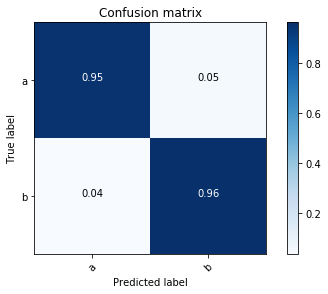

In [147]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['a','b'], normalize=True)

In [103]:
%time gbm = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.5, n_jobs=4).fit(x_train, y_train)
print("done")

Wall time: 1.67 s
done


In [104]:
%time y_pred = gbm.predict(x_test)
print("done")

Wall time: 17 ms
done


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [105]:
accuracy_score(y_test, y_pred)

0.9301623254058136

In [106]:
confusion_matrix(y_test, y_pred)

array([[1254,  107],
       [  78, 1210]], dtype=int64)

Normalized confusion matrix
[[0.92138134 0.07861866]
 [0.06055901 0.93944099]]


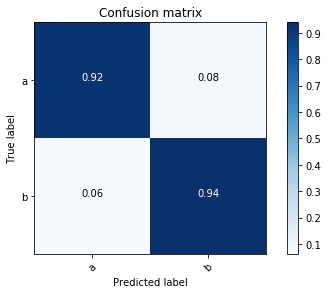

In [107]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['a','b'], normalize=True)

In [148]:
from sklearn import linear_model

In [149]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [150]:
y_pred = logreg.predict(x_test)

In [152]:
accuracy_score(y_test, y_pred)

0.9226123065307663

Normalized confusion matrix
[[0.92159877 0.07840123]
 [0.0764095  0.9235905 ]]


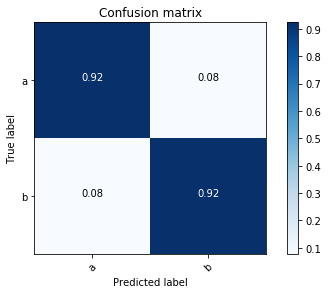

In [151]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['a','b'], normalize=True)